In [1]:
import argparse
import os
from pathlib import Path

# import pytorch_lightning as pl
# from lightning_fabric.utilities.seed import seed_everything
from easydict import EasyDict as edict
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint
import torch

from fno_field_prediction.data import BlobData
from fno_field_prediction.models import VAE2d, VAE3d

/home/mila/l/letournv/miniconda3/envs/vae/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mila/l/letournv/miniconda3/envs/vae/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/mila/l/letournv/miniconda3/envs/vae/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c104warnERKNS_7WarningE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
args = edict({'seed': 912374122, 
             'latent_dim': 2048, 
             'channels_encode': [8, 16, 32, 64, 128, 256], 
             'channels_decode': [256, 128, 64, 32, 16, 8], 
             'kld_weight': 0.2, 
             'kld_weight_annealing': None, 
             'bin_cutoff': 3.0, 'bin_weight': 0.0, 
             'bin_weight_annealing': None, 
             'shape': [128, 128], 
             'sigma': 12, 
             'batch_size': 64, 
             'steps': 20000, 
             'lr': 0.0002, 
             'weight_decay': 1e-06, 
             'name': None, 
             'group': None, 
             'accelerator': 'auto', 
             'devices': 1, 
             'num_nodes': 1, 
             'num_workers': 0, 
             'strategy': None, 
             'dev': False, 
             'checkpoint_dir': None})

In [3]:
module = VAE3d if len(args.shape) == 3 else VAE2d
model = module(
    args.latent_dim,
    args.channels_encode,
    args.channels_decode,
    input_dim=args.shape[0],
    output_dim=args.shape[0],
    kld_weight=args.kld_weight,
    kld_weight_annealing=args.kld_weight_annealing,
    bin_weight=args.bin_weight,
    bin_cutoff=args.bin_cutoff,
    bin_weight_annealing=args.bin_weight_annealing,
    lr=args.lr,
    weight_decay=args.weight_decay,
    steps=args.steps,
)

In [4]:
# PATH = os.path.expanduser('~/scratch/checkpoints/128128/None_latent2048_step=20000_elbo=-3.110e+00.ckpt')
PATH = os.path.expanduser('~/scratch/checkpoints/128128/last.ckpt')
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [5]:
deco = model.decoder

In [6]:
z = torch.rand(4,2048)

In [11]:
img = deco(z)

In [10]:
import matplotlib.pyplot as plt

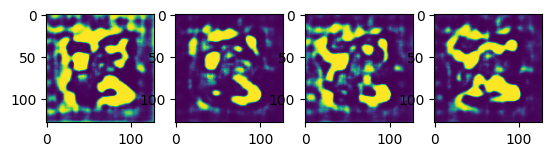

In [14]:
fig, axes = plt.subplots(1,4)
for i in range(4):
    axes[i].imshow(img[i].detach().numpy().squeeze())
plt.show()